In [1]:
from tab_q_learning2 import TabularQLearning
from custom_spider_env.spider_fly_env.envs.grid_MA_testing import SpiderFlyEnvMA
from custom_spider_env.spider_fly_env.envs.pettingzoo_wrapper import PettingZooWrapper

import numpy as np

import pandas as pd

/home/hkolstee/.local/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment SpiderFlyGrid-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/hkolstee/.local/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment SpiderFlyGridMA-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


#### Normal Q-learning (Decentralized with Q-table per agent)

In [2]:
env = SpiderFlyEnvMA(render_mode = "ascii")
env = PettingZooWrapper(env)

env.observation_space[0].sample()

['X' ' ' 'O' ' ' ' ' 'X' 'O']


array([5, 1, 6, 3])

In [3]:
env = SpiderFlyEnvMA(max_steps = 200)
env = PettingZooWrapper(env)

In [4]:
tabqlearning = TabularQLearning(env) 

In [5]:
rewards = tabqlearning.train(100000)

Episode: 0 - Reward:[5 3]


Episode: 5000 - Reward:[100  88]
Episode: 10000 - Reward:[116 112]
Episode: 15000 - Reward:[117 109]
Episode: 20000 - Reward:[114 108]
Episode: 25000 - Reward:[123 116]
Episode: 30000 - Reward:[106 110]
Episode: 35000 - Reward:[116 115]
Episode: 40000 - Reward:[112 112]
Episode: 45000 - Reward:[105 113]
Episode: 50000 - Reward:[109 118]
Episode: 55000 - Reward:[120 118]
Episode: 60000 - Reward:[116 121]
Episode: 65000 - Reward:[118 107]
Episode: 70000 - Reward:[108 111]
Episode: 75000 - Reward:[119 122]
Episode: 80000 - Reward:[116 114]
Episode: 85000 - Reward:[120 118]
Episode: 90000 - Reward:[110 102]
Episode: 95000 - Reward:[116 118]


In [6]:
data = np.vstack(rewards)

df = pd.DataFrame(data, columns = ["agent_" + str(idx) for idx in range(tabqlearning.nr_agents)])
df["Episode"] = list(range(data.shape[0]))

df = df.melt('Episode', var_name='Agent', value_name='Rewards')

In [7]:
# we need 1.5.0 for rolling average of next step
pd.__version__

'1.5.0'

In [8]:
df["Avg_Reward"] = df["Rewards"].rolling(window = 50, step = 50).mean()
df = df[df.Episode > 50]
df.dropna()

,Episode,Agent,Rewards,Avg_Reward
100,100,agent_0,45,18.22
150,150,agent_0,68,47.10
200,200,agent_0,66,55.90
250,250,agent_0,62,55.96
300,300,agent_0,53,59.28
...,...,...,...,...
199750,99750,agent_1,112,114.60
199800,99800,agent_1,108,112.70
199850,99850,agent_1,128,113.80
199900,99900,agent_1,114,114.00


<Axes: xlabel='Episode', ylabel='Avg_Reward'>

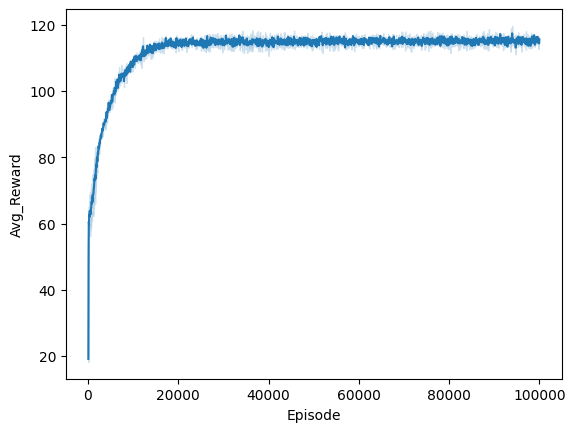

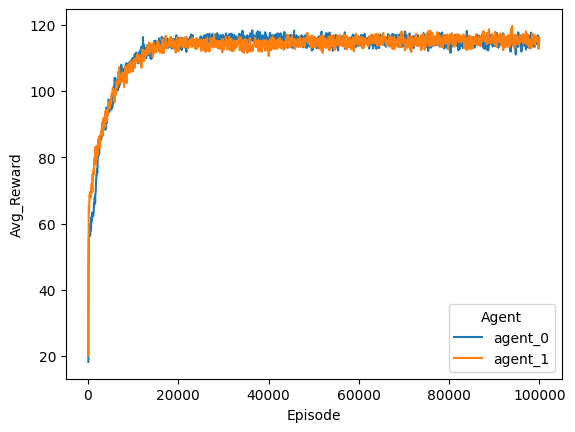

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df, x = "Episode", y = "Avg_Reward")
plt.figure()
sns.lineplot(data = df, x = "Episode", y = "Avg_Reward", hue = "Agent")

#### Sequential Q-learning

Tabular Q-learning:
$$
\begin{align*}
    & s = env.reset()\\
    &\text{while not } done:\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad a_i = \argmax_{a_i} Q_i(s_i, a_i)\\
    & \quad\quad s', r, d = env.step(a_1, \ldots, a_m)\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad Q_i(s_i, a_i) = Q_i(s_i, a_i) + lr * ((mean(r) + \gamma * \max_{a'_i} Q_i(s'_i, a'_i)) - Q_i(s_i, a_i))\\
\end{align*}
$$


Sequential Tabular Q-learning:
$$
\begin{align*}
    & s = env.reset()\\
    &\text{while not } done:\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m):\\
    & \quad\quad\quad\quad a_i = \argmax_{a_i} Q_i(s_i, a_1, \ldots, a_i)\\
    & \quad\quad s', r, d = env.step(a_1, \ldots, a_m)\\
    & \quad\quad \text{for } i \text{ in } (1, \ldots, m-1):\\
    & \quad\quad\quad\quad Q_i(s_i, a_1, \ldots, a_i) = Q_i(s_i, a_1, \ldots, a_i) + (i/m) * lr * (\max_{a_{i+1}} Q_{i+1}(s_{i+1}, a_1, \ldots, a_{i+1}) - Q_i(s_i, a_1, \ldots, a_i))\\
    & \quad\quad Q_m(s_m, a_1, \ldots, a_m) = Q_m(s_i, a_1, \ldots, a_m) + lr * ((mean(r) + \gamma * \max_{a'_1} Q_1(s'_1, a'_1)) - Q_m(s_m, a_1, \ldots, a_m))\\
\end{align*}
$$

In [16]:
from tab_q_learning_seq2 import SequentialTabularQLearning
from custom_spider_env.spider_fly_env.envs.grid_MA_testing import SpiderFlyEnvMA
from custom_spider_env.spider_fly_env.envs.pettingzoo_wrapper import PettingZooWrapper

import numpy as np

import pandas as pd

In [17]:
env = SpiderFlyEnvMA(max_steps = 200)
env = PettingZooWrapper(env)

In [18]:
seqTabqlearning = SequentialTabularQLearning(env)

In [19]:
rewards = seqTabqlearning.train(150000)

Episode: 0 - Reward:[3 3]


Episode: 7500 - Reward:[70 86]
Episode: 15000 - Reward:[ 56 109]
Episode: 22500 - Reward:[ 72 110]
Episode: 30000 - Reward:[103  99]
Episode: 37500 - Reward:[106  89]
Episode: 45000 - Reward:[101 105]
Episode: 52500 - Reward:[105 104]
Episode: 60000 - Reward:[113 102]
Episode: 67500 - Reward:[105  98]
Episode: 75000 - Reward:[103  98]
Episode: 82500 - Reward:[108 108]
Episode: 90000 - Reward:[118 103]
Episode: 97500 - Reward:[ 91 118]
Episode: 105000 - Reward:[110 102]
Episode: 112500 - Reward:[120 107]
Episode: 120000 - Reward:[113 113]
Episode: 127500 - Reward:[107 115]
Episode: 135000 - Reward:[109 122]
Episode: 142500 - Reward:[105 121]


In [20]:
data = np.vstack(rewards)

df = pd.DataFrame(data, columns = ["agent_" + str(idx) for idx in range(seqTabqlearning.nr_agents)])
df["Episode"] = list(range(data.shape[0]))

df = df.melt('Episode', var_name='Agent', value_name='Rewards')

df["Avg_Reward"] = df["Rewards"].rolling(window = 50, step = 50).mean()
df = df[df.Episode > 50]
df.dropna()

,Episode,Agent,Rewards,Avg_Reward
100,100,agent_0,7,6.50
150,150,agent_0,11,17.76
200,200,agent_0,34,29.96
250,250,agent_0,33,44.88
300,300,agent_0,56,44.82
...,...,...,...,...
299750,149750,agent_1,119,116.02
299800,149800,agent_1,123,115.06
299850,149850,agent_1,110,113.42
299900,149900,agent_1,105,114.10


<Axes: xlabel='Episode', ylabel='Avg_Reward'>

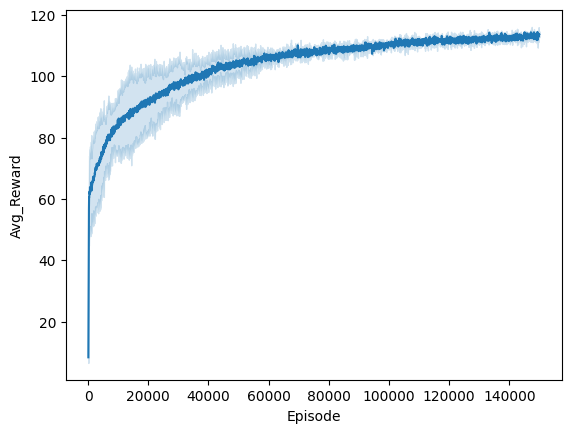

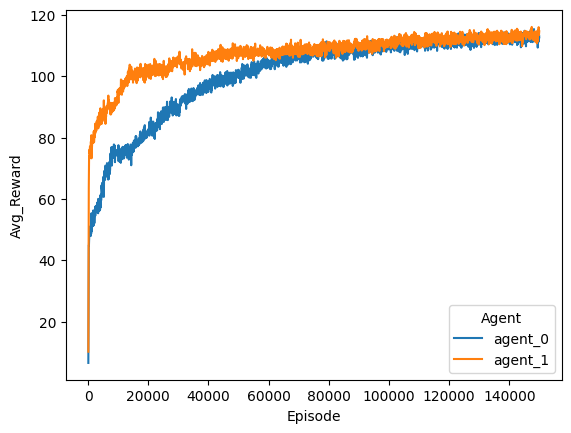

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df, x = "Episode", y = "Avg_Reward")
plt.figure()
sns.lineplot(data = df, x = "Episode", y = "Avg_Reward", hue = "Agent")